In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_excel("https://raw.githubusercontent.com/andresmorenoviteri/data_analysis/main/insurance_data.xlsx")
dataset.head(50)

,Alter,Geschlecht,BMI,Kinder,Raucher,Region,Preise
0,19,weblich,27.900,0.0,ja,Südwest,16884.924
1,18,männlich,33.770,1.0,nein,Südost,1725.5523
2,28,männlich,33.000,3.0,nein,Südost,4449.462
3,33,männlich,22.705,0.0,nein,Nordwest,21984.47061
4,32,männlich,28.880,0.0,nein,Nordwest,3866.8552
5,31,weiblich,25.740,0.0,nein,Südost,3756.6216
6,46,weiblich,33.440,1.0,nein,Südost,8240.5896
7,37,weiblich,27.740,3.0,nein,Nordwest,7281.5056
8,37,männlich,29.830,2.0,nein,Nordost,6406.4107
9,60,weiblich,25.840,0.0,nein,Nordwest,28923.13692


#### Check length of dataset

In [64]:
len(dataset)

36

#### Check type of data

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Alter       36 non-null     int64  
 1   Geschlecht  36 non-null     object 
 2   BMI         35 non-null     float64
 3   Kinder      35 non-null     float64
 4   Raucher     35 non-null     object 
 5   Region      34 non-null     object 
 6   Preise      35 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.1+ KB


conclusions:
- gender should only have 2 types
- BMI, kinder, smoker, region, and price have less than 36 non-null, at least one is missing 
- dtype in price is object, that should be checked

#### check one by one

In [66]:
types_of_genders = dataset['Geschlecht'].unique()
print(f"types of genders: {types_of_genders}")

types of genders: ['weblich' 'männlich' 'weiblich']


- change 'weblich to 'weiblich'
- row 29 doesn't give us any info if so much data is missing, remove
- region on row 14, we can change to most frequent region
- price on row 18 could be change to average price, to keep and use the other info from it 

In [67]:
# change number of genders to 2
dataset['Geschlecht'] =  dataset['Geschlecht'].replace('weblich', 'weiblich')
types_of_genders = dataset['Geschlecht'].unique()
print(f"types of genders: {types_of_genders}")

# remove row that is useless
dataset = dataset.drop(index=29)
dataset.head()

# on region, replace 'NaN' with mode
dataset['Region'].fillna(dataset['Region'].mode()[0], inplace=True)

# on price, replace 'NaN' or non values with average
dataset['Preise'] = dataset['Preise'].replace('hoch', np.nan)
dataset['Preise'] = dataset['Preise'].astype('float64')
dataset['Preise'].fillna(dataset['Preise'].mean(), inplace=True)

types of genders: ['weiblich' 'männlich']


In [68]:
dataset.head(40)

,Alter,Geschlecht,BMI,Kinder,Raucher,Region,Preise
0,19,weiblich,27.900,0.0,ja,Südwest,16884.924000
1,18,männlich,33.770,1.0,nein,Südost,1725.552300
2,28,männlich,33.000,3.0,nein,Südost,4449.462000
3,33,männlich,22.705,0.0,nein,Nordwest,21984.470610
4,32,männlich,28.880,0.0,nein,Nordwest,3866.855200
5,31,weiblich,25.740,0.0,nein,Südost,3756.621600
6,46,weiblich,33.440,1.0,nein,Südost,8240.589600
7,37,weiblich,27.740,3.0,nein,Nordwest,7281.505600
8,37,männlich,29.830,2.0,nein,Nordost,6406.410700
9,60,weiblich,25.840,0.0,nein,Nordwest,28923.136920


In [69]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 35
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Alter       35 non-null     int64  
 1   Geschlecht  35 non-null     object 
 2   BMI         35 non-null     float64
 3   Kinder      35 non-null     float64
 4   Raucher     35 non-null     object 
 5   Region      35 non-null     object 
 6   Preise      35 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.2+ KB


#### Check averages

In [73]:
avg_age = dataset['Alter'].mean()
avg_bmi = dataset['BMI'].mean()
avg_num_kind = dataset['Kinder'].mean()
avg_price = dataset['Preise'].mean()

print(f"average age: {int(avg_age)}")
print(f"average bmi: {round(avg_bmi, 2)}")
print(f"average number of children: {int(avg_num_kind)}")
print(f"average price: {round(avg_price, 2)}")

average age: 36
average bmi: 30.05
average number of children: 0
average price: 13336.06


In [ ]:
dataset.corr()

In [74]:
# number of smokers and non smokers
num_smokers = dataset['Raucher'][dataset['Raucher'] == 'ja'].count()
num_non_smokers = dataset['Raucher'][dataset['Raucher'] == 'nein'].count()

print(f"smokers: {num_smokers}")
print(f"non smokers: {num_non_smokers}")

smokers: 7
non smokers: 28


#### check how each column affects the price

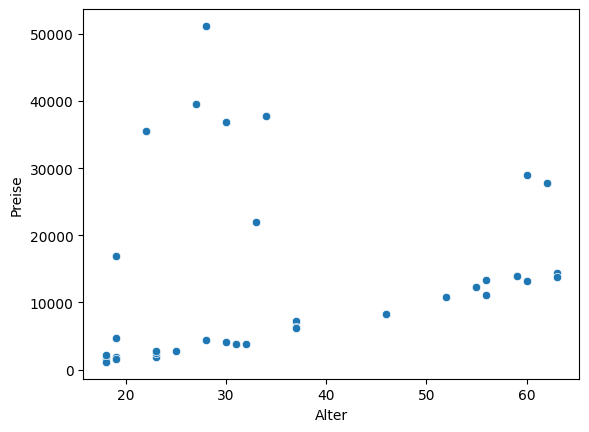

weiblich average price: 13591.98
männlich average price: 13120.55


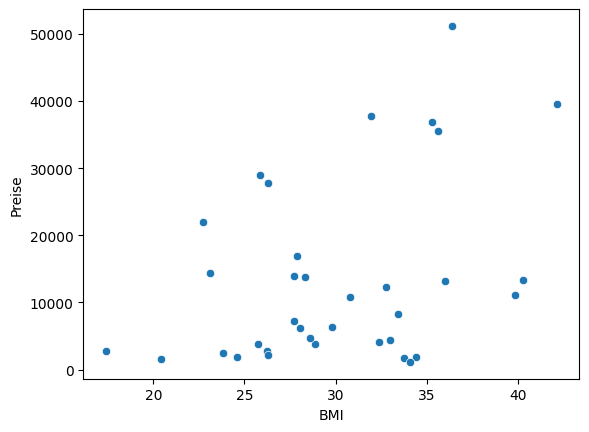

0.0 children average price: 14652.05
1.0 children average price: 14802.76
3.0 children average price: 8577.37
2.0 children average price: 8292.98
5.0 children average price: 4687.8


smoker ja average price: 35089.27
smoker nein average price: 7897.75


Südwest average price: 18482.24
Südost average price: 9026.23
Nordwest average price: 13831.1
Nordost average price: 11237.62


In [83]:
# age 
sns.scatterplot(data=dataset, x='Alter', y='Preise')
plt.show()

# gender 
for gender in dataset['Geschlecht'].unique():
    print(f"{gender} average price: {round(dataset['Preise'][dataset['Geschlecht']==gender].mean(), 2)}")

# BMI
sns.scatterplot(data=dataset, x='BMI', y='Preise')
plt.show()

# number of children
for children in dataset['Kinder'].unique():
    print(f"{children} children average price: {round(dataset['Preise'][dataset['Kinder']==children].mean(), 2)}")
print('\n')

# smoker
for smoke in dataset['Raucher'].unique():
    print(f"smoker {smoke} average price: {round(dataset['Preise'][dataset['Raucher']==smoke].mean(), 2)}")
print('\n')

# region
for region in dataset['Region'].unique():
    print(f"{region} average price: {round(dataset['Preise'][dataset['Region']==region].mean(), 2)}")


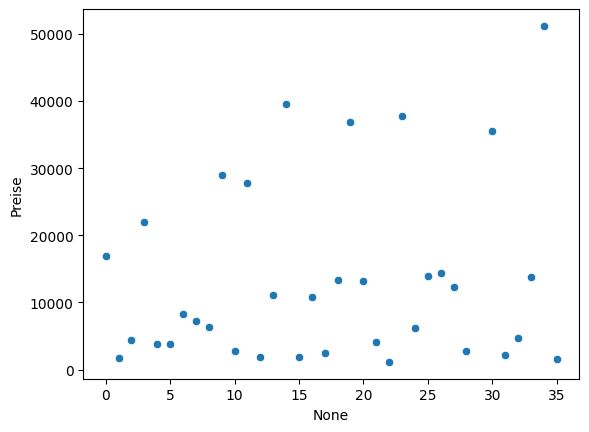

In [87]:
sns.scatterplot(data=dataset, y='Preise', x=dataset.index)
plt.show()